# Upper and middle class workers in Ile de France

In [1]:
from pynsee import get_file_list, download_file, get_geodata

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import logging
import sys
logging.basicConfig(stream=sys.stdout,
                    level=logging.INFO, 
                    format="%(message)s")

In [3]:
meta = get_file_list()
meta[meta.id.str.contains("RP_ACTRES_IRIS")].T.dropna()

Existing environment variable sirene_key used, instead of locally saved credentials
https://minio.lab.sspcloud.fr/pierrelamarche/melodi/liste_donnees.json
https://raw.githubusercontent.com/InseeFrLab/DoReMIFaSol/master/data-raw/liste_donnees.json
pynsee.download's metadata rely on volunteering contributors and their manual updates. get_file_list does not provide data from official Insee's metadata API
Consequently, please report any issue


,1497
id,RP_ACTRES_IRIS
name,RP_ACTRES_IRIS
date_ref,2017-01-01
label,"Données du Recensement de Population, données ..."
collection,RP
link,https://www.insee.fr/fr/statistiques/fichier/4...
type,xlsx
zip,True
api_rest,False
size,60768390


In [4]:
dfraw = download_file("RP_ACTRES_IRIS", silent=True)

In [5]:
# Metadata from insee.fr : https://www.insee.fr/fr/statistiques/4799323#dictionnaire
# P17_ACT1564 : nombre de personnes actives de 15 à 64 ans
# C17_ACT1564 : nombre de personnes actives de 15 à 64 ans
# C17_ACT1564_CS1 : nombre d'agriculteurs exploitants actifs de 15 à 64 ans
# C17_ACT1564_CS2 : nombre d'artisans, commerçants, chefs d'entreprise actifs de 15 à 64 ans
# C17_ACT1564_CS3 : nombre de cadres et professions intellectuelles supérieures actifs de 15 à 64 ans

In [6]:
df = dfraw[["IRIS", "COM", "REG", "DEP", "LIBCOM", "C17_ACT1564", "C17_ACT1564_CS2", "C17_ACT1564_CS3"]]
df = df[(df["REG"] == "11") ] #& ~(df["DEP"] == "77")
df["C17_ACT1564_CS2"] = pd.to_numeric(df["C17_ACT1564_CS2"])
df["C17_ACT1564_CS3"] = pd.to_numeric(df["C17_ACT1564_CS3"])
df["C17_ACT1564"] = pd.to_numeric(df["C17_ACT1564"])
df["pct"] = 100 * (df["C17_ACT1564_CS2"] + df["C17_ACT1564_CS3"]) / df["C17_ACT1564"]

df = df.reset_index(drop=True)
df

,IRIS,COM,REG,DEP,LIBCOM,C17_ACT1564,C17_ACT1564_CS2,C17_ACT1564_CS3,pct
0,751010101,75101,11,75,Paris 1er Arrondissement,520.643927,29.702144,190.009987,42.200076
1,751010102,75101,11,75,Paris 1er Arrondissement,71.145629,9.899243,36.903044,65.783784
2,751010103,75101,11,75,Paris 1er Arrondissement,107.952527,18.057574,55.539455,68.175365
3,751010104,75101,11,75,Paris 1er Arrondissement,0.000000,0.000000,0.000000,NaN
4,751010105,75101,11,75,Paris 1er Arrondissement,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
5257,956800112,95680,11,95,Villiers-le-Bel,831.396737,54.511641,35.417896,10.816681
5258,956800113,95680,11,95,Villiers-le-Bel,885.164069,26.592849,32.183605,6.640176
5259,956800114,95680,11,95,Villiers-le-Bel,664.336730,24.113011,11.521560,5.363932
5260,956820000,95682,11,95,Villiers-le-Sec,117.460317,4.894180,24.470899,25.000000


In [7]:
shapefile = get_geodata('STATISTICALUNITS.IRIS:contours_iris', crs=3857)

Previously saved data has been used:
C:\Users\utilisateur\AppData\Local\pynsee\pynsee\Cache\pynsee\c3913eda113a24f853840db21260211e.parquet
Creation date: 2025-03-06, today
Set update=True to get the most up-to-date data


In [8]:
DF = shapefile[["code_iris", "geometry"]].merge(df, how = "right", left_on = "code_iris", right_on = "IRIS")

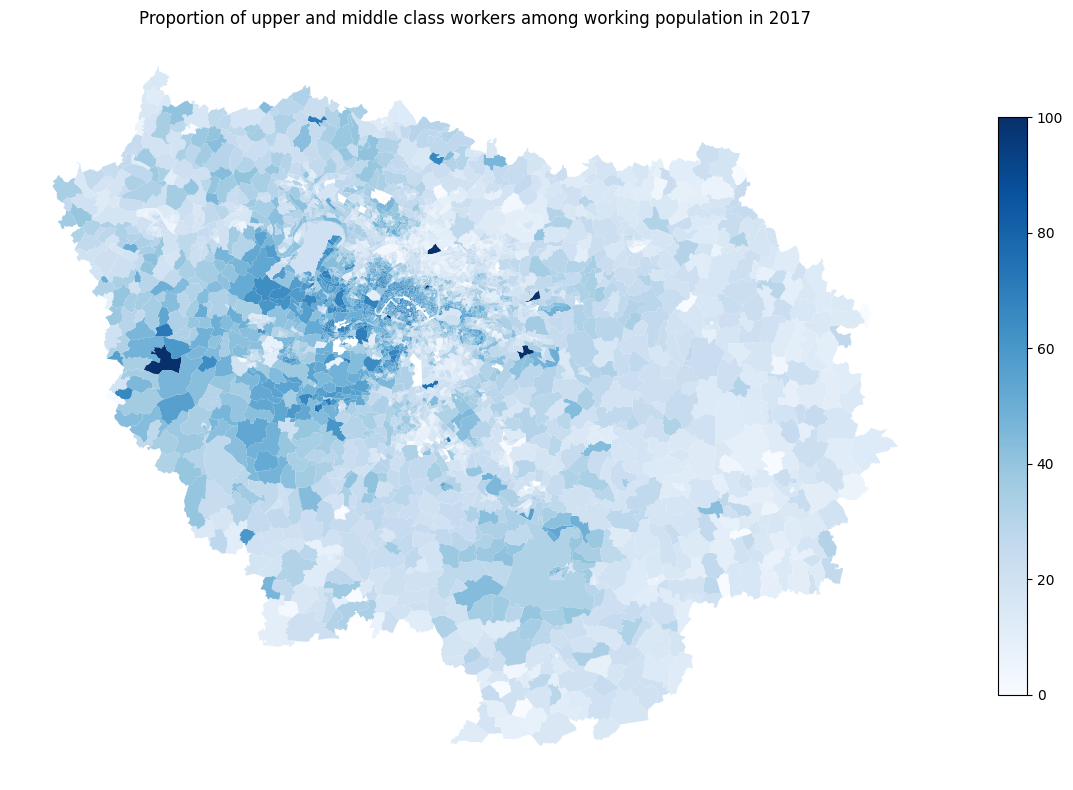

In [9]:
fig, ax = plt.subplots(1,1,figsize=[15,15])
DF.plot(column='pct', cmap=sns.color_palette("Blues", as_cmap=True), 
    legend=True, ax=ax, legend_kwds={'shrink': 0.5})
ax.set_axis_off()
ax.set(title='Proportion of upper and middle class workers among working population in 2017')
plt.show()